<h1 id="Title">Analyze-of-VFfootfall</h1>
Author: Adam Hsing | 
Date: 27/04/2019 12:26 | 
Location: Bocconi University, Milano, Italy

In [ ]:
# pip install xgboost==0.80
# pip install graphviz

In [367]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [368]:
df = pd.read_csv("FootfallData.csv")

# take a look at the dataset
df.head()

,Store_ID,Metratura_scaled,FTE_scaled,PTE_scaled,QAC_Oct_scaled,QAC_Nov_scaled,QAC_Dec_scaled,QAC_Jan_scaled,QAC_Feb_scaled,QAC_Mar_scaled,...,night_MEAN_scaled_ARPU_1000,night_MIN_scaled_ARPU_1000,night_MAX_scaled_ARPU_1000,midday_MEAN_scaled_ARPU_1000,midday_MIN_scaled_ARPU_1000,midday_MAX_scaled_ARPU_1000,weekend_MEAN_scaled_ARPU_1000,weekend_MIN_scaled_ARPU_1000,weekend_MAX_scaled_ARPU_1000,Footfall_classif
0,109,0.248963,0.375,0.0,0.041322,0.021407,0.166667,0.031250,0.050000,0.069767,...,0.394142,0.986070,0.049386,0.412237,1.000000,0.087235,0.521526,0.995580,0.691640,1
1,181,0.174274,0.375,0.8,0.033058,0.070336,0.000000,0.015625,0.050000,0.023256,...,0.400909,0.576339,0.163069,0.446382,0.668080,0.375562,0.462580,0.795810,0.394455,2
2,137,0.203320,0.375,0.0,0.090909,0.180428,0.012821,0.093750,0.116667,0.186047,...,0.292744,0.980967,0.744937,0.416422,0.988770,0.592596,0.365823,0.968131,0.740991,1
3,351,0.190871,0.375,0.0,0.074380,0.018349,0.000000,0.109375,0.133333,0.093023,...,0.414978,0.975537,0.402787,0.453379,0.984467,0.270401,0.511280,0.990444,0.394455,1
4,122,0.145228,0.375,0.0,0.008264,0.021407,0.025641,0.031250,0.016667,0.069767,...,0.206086,0.975620,0.148472,0.286770,0.992327,0.275639,0.283948,0.988803,0.136880,2


<h2 id="data_exploration">Data Exploration</h2>

Lets first have a descriptive exploration on our data.

In [369]:
# summarize the data
df.describe()

,Store_ID,Metratura_scaled,FTE_scaled,PTE_scaled,QAC_Oct_scaled,QAC_Nov_scaled,QAC_Dec_scaled,QAC_Jan_scaled,QAC_Feb_scaled,QAC_Mar_scaled,...,night_MEAN_scaled_ARPU_1000,night_MIN_scaled_ARPU_1000,night_MAX_scaled_ARPU_1000,midday_MEAN_scaled_ARPU_1000,midday_MIN_scaled_ARPU_1000,midday_MAX_scaled_ARPU_1000,weekend_MEAN_scaled_ARPU_1000,weekend_MIN_scaled_ARPU_1000,weekend_MAX_scaled_ARPU_1000,Footfall_classif
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,192.658385,0.208861,0.365489,0.100621,0.100380,0.160522,0.103201,0.163189,0.136646,0.154918,...,0.278045,0.968318,0.149500,0.338360,0.981298,0.181923,0.341015,0.966952,0.267531,1.003106
std,117.733561,0.101377,0.171945,0.186289,0.081734,0.134799,0.085142,0.122105,0.106769,0.121043,...,0.149097,0.111067,0.143388,0.155155,0.087566,0.194507,0.161974,0.096785,0.203285,0.818396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001723,0.000000,0.000000,0.018379,0.000000,0.000000,0.004686,0.000000,0.000804,0.000000
25%,90.250000,0.149378,0.250000,0.000000,0.057851,0.052752,0.051282,0.093750,0.066667,0.069767,...,0.182936,0.980153,0.042903,0.229656,0.989236,0.041462,0.238700,0.978500,0.109562,0.000000
50%,185.000000,0.186722,0.375000,0.000000,0.090909,0.114679,0.089744,0.140625,0.116667,0.139535,...,0.267250,0.992364,0.101220,0.342079,0.997910,0.105868,0.343422,0.992695,0.220816,1.000000
75%,293.750000,0.248963,0.500000,0.200000,0.132231,0.247706,0.141026,0.203125,0.166667,0.209302,...,0.365328,0.995136,0.206804,0.424756,1.000000,0.249573,0.442108,0.998141,0.372487,2.000000
max,402.000000,0.842324,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.744937,1.000000,1.000000,1.000000,1.000000,1.000000,0.993224,2.000000


<h2 id="understanding_data">Understanding the Data</h2>

### The 'FootfallData.csv' file:

The dataset describes the profiles of VF customers nearby the Vodafone stores and the stores’ characteristics. 

The variables provided are:
- **Localita_encoded**  
Geographical: town  
- **Provincia_encoded**  
Geographical: province  
- **Tipologia_encoded**   
Store type, which is a VF label to describe whether the store is a TOP performer, whether is located in a shopping mall, etc.
- **area_encoded**   
Geographical: VF area
- **FTE_scaled**   
Number of employees: FTE (full time equivalent)
- **PTE_scaled**   
Number of employees: PTE(part time equivalent)
- **SM si/no_encoded**   
Number of employees: store manager
- **Metratura_scaled**   
VF store square meters
- **QAC_Oct;Nov;Dec;Jan;Feb;Mar_scaled**   
Monthly number of tickets opened for phone assistance (known as QAC) by the store
- **TNPS_Oct;Nov;Dec;Jan;Feb_scaled**   
Monthly TNPS, which is the grade given by VF customers, who visited the store, about the store itself and its services, employees, etc.
- **night_Fixed_CB_%_scaled_200;500;1000**   
Nightly Fixed line CB size, which is the number of VF customer swith a VF fixed line contract living nearby the VF store
- **midday_Fixed_CB_%_scaled_200;500;1000**   
Daily Fixed line CB size, which is the number of VF customer swith a VF fixed line contract working nearby the VF store
- **CB_Night_scaled_200;500;1000**   
Nightly CB size, which are the number of VF customers living nearby the VF store
- **CB_Midday_scaled_200;500,1000**   
Daily CB size, which are the number of VF customers working close by the VF store
- **CB_Weekend_scaled_200;500;1000**   
Weekend CB size, which is the average number of VF customers passing by the VF store on the weekend
- **night_MEAN;MIN;MAX_scaled_ARPU_200;500;1000**   
Average, min and max night ARPU(Average revenue per user) for the store CBs
- **midday_MEAN;MIN:MAX_scaled_ARPU_200;500;1000**   
Average, min and max daily ARPU for the store CBs
- **weekend_MEAN;MIN;MAX_scaled_ARPU_200;500;1000**   
Average, min and max weekend ARPU for the store CBs

*Note: some of the variable is provided considering the CB detected in a circle with radius of 200, 500 and 1000 meters and centred on the VF store, i.e. three values are provided*

<h2 id="examine null value">examine null value</h2>

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 64 columns):
Store_ID                         322 non-null int64
Metratura_scaled                 322 non-null float64
FTE_scaled                       322 non-null float64
PTE_scaled                       322 non-null float64
QAC_Oct_scaled                   322 non-null float64
QAC_Nov_scaled                   322 non-null float64
QAC_Dec_scaled                   322 non-null float64
QAC_Jan_scaled                   322 non-null float64
QAC_Feb_scaled                   322 non-null float64
QAC_Mar_scaled                   322 non-null float64
TNPS_Oct_scaled                  322 non-null float64
TNPS_Nov_scaled                  322 non-null float64
TNPS_Dec_scaled                  322 non-null float64
TNPS_Jan_scaled                  322 non-null float64
TNPS_Feb_scaled                  322 non-null float64
Tipologia_encoded                322 non-null int64
Localita_encoded                 32

The hist graphs below are clear to show the distribution of each variable.

/Users/apple/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


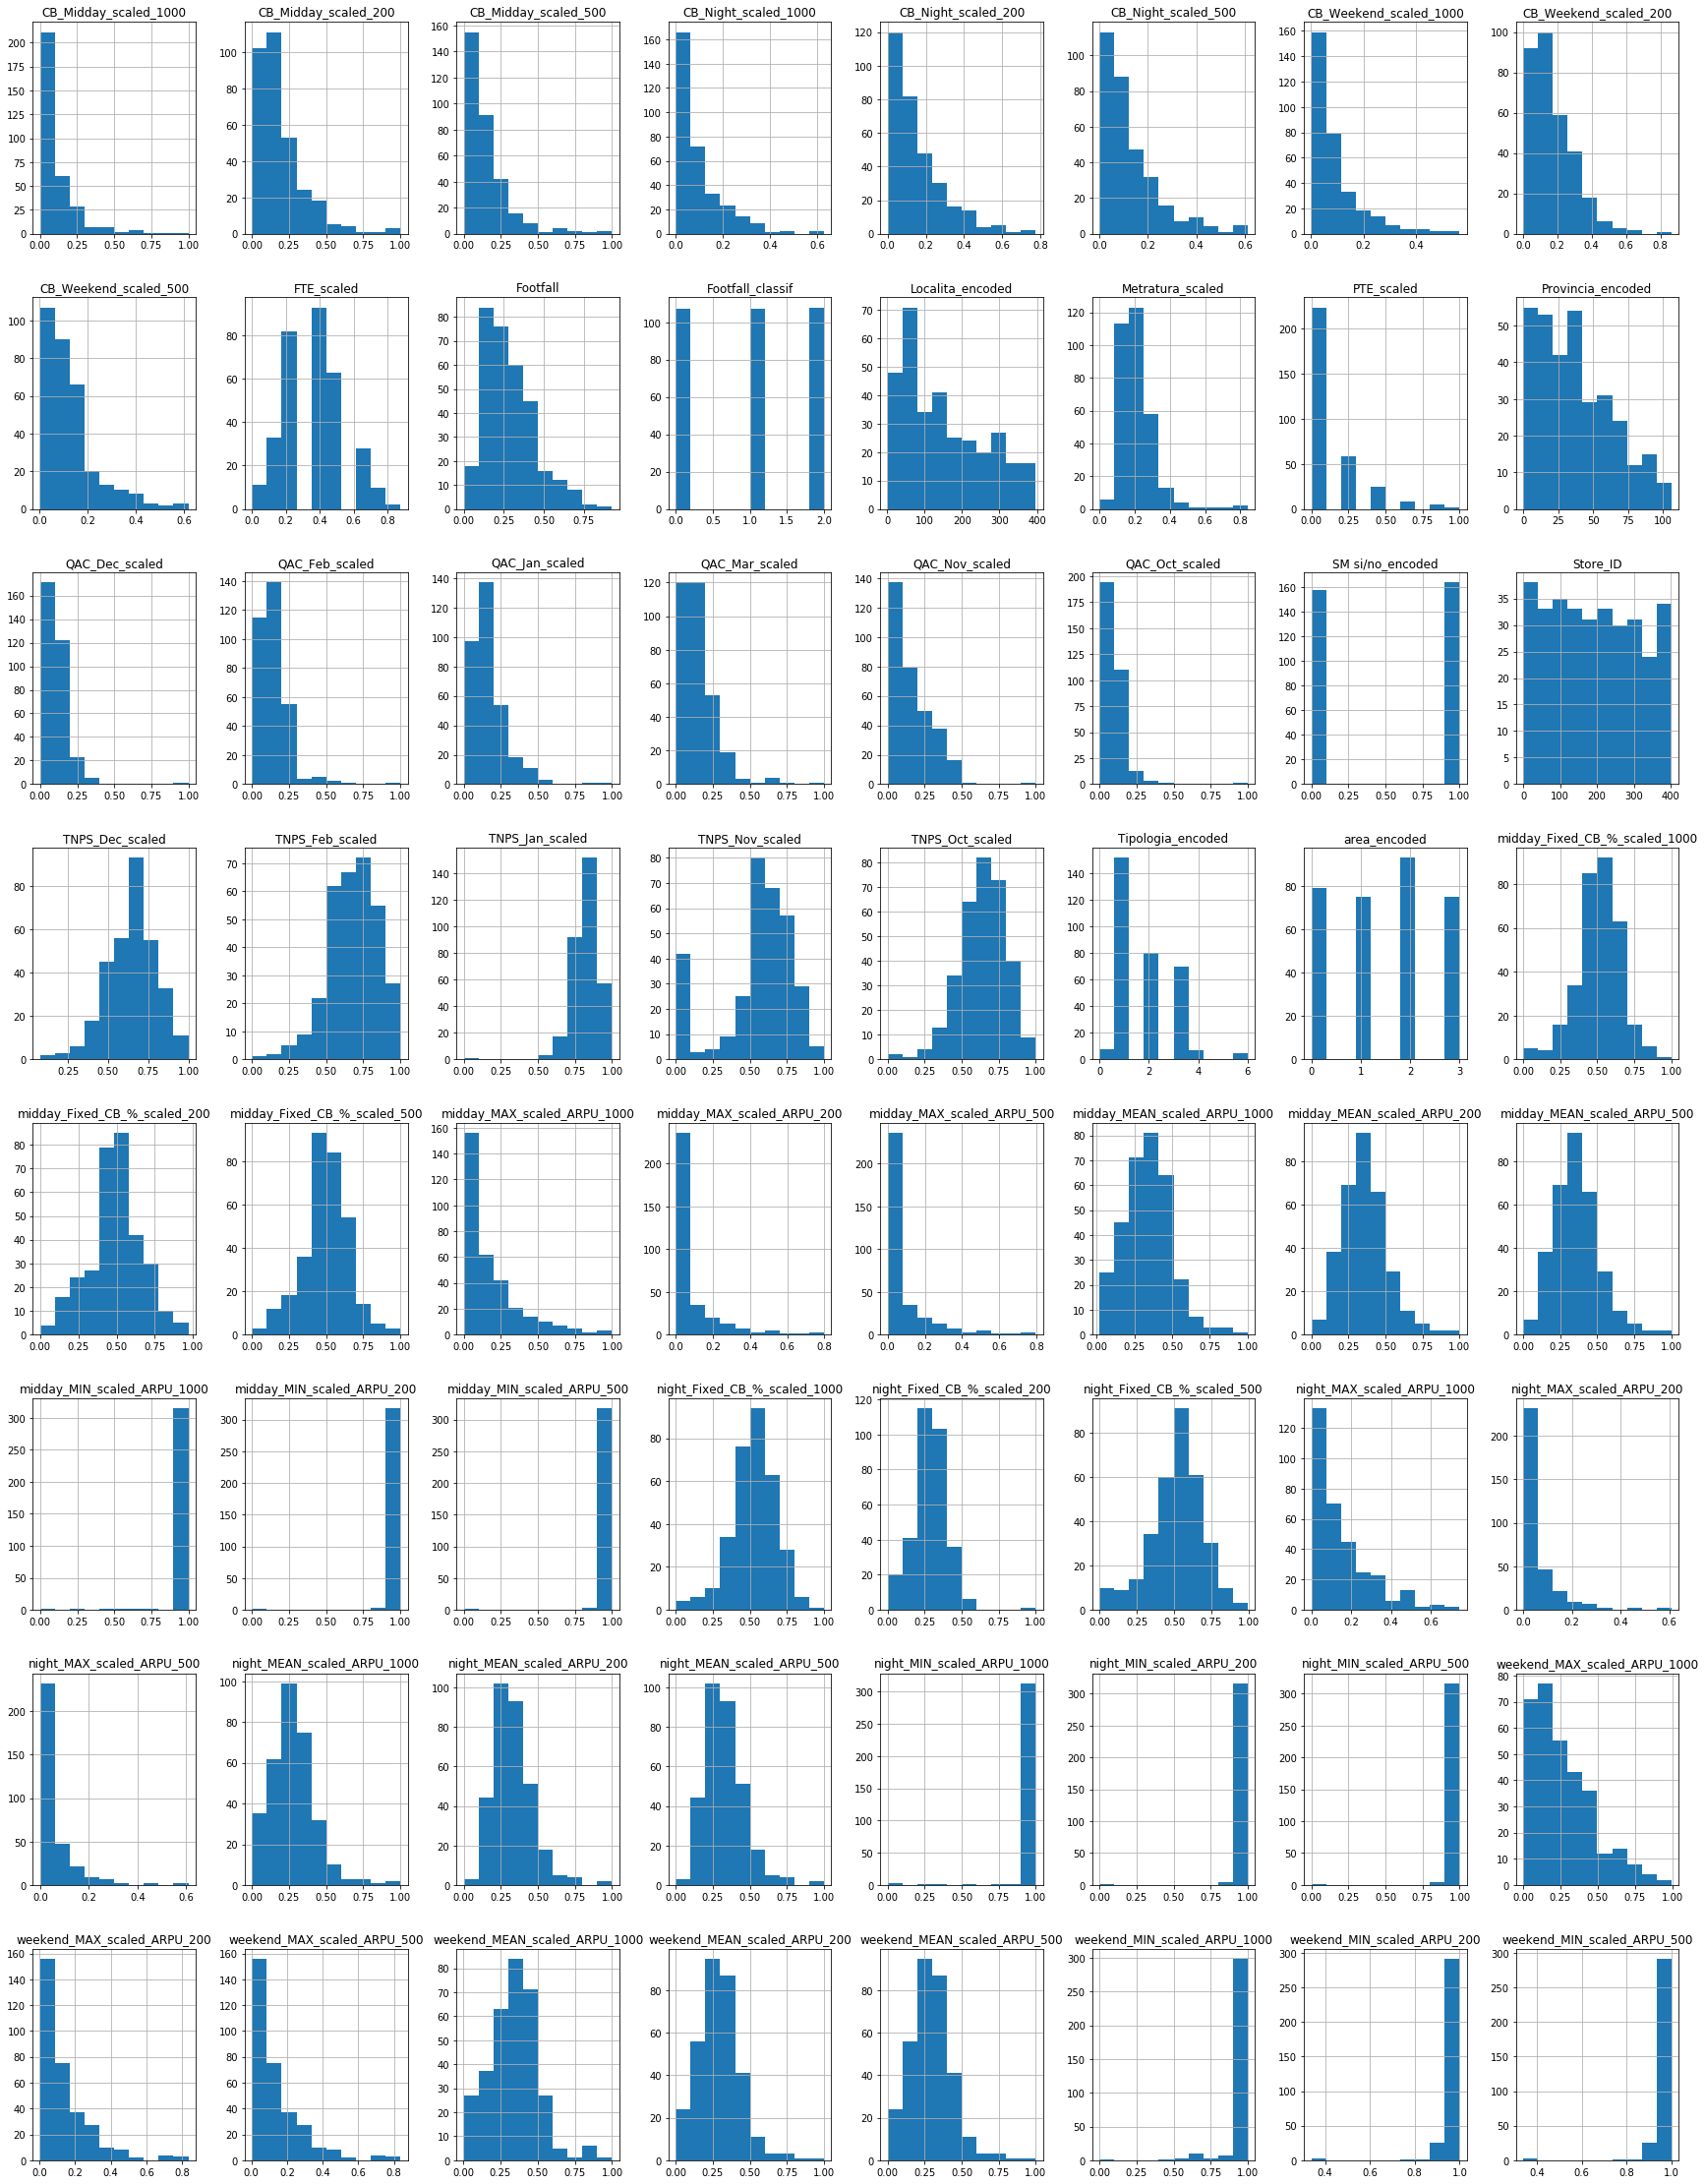

In [371]:
fig = plt.figure(figsize = (30,40))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

<h2 id="Data Processing">Data PreProcessing</h2>

In [372]:
import seaborn as sns

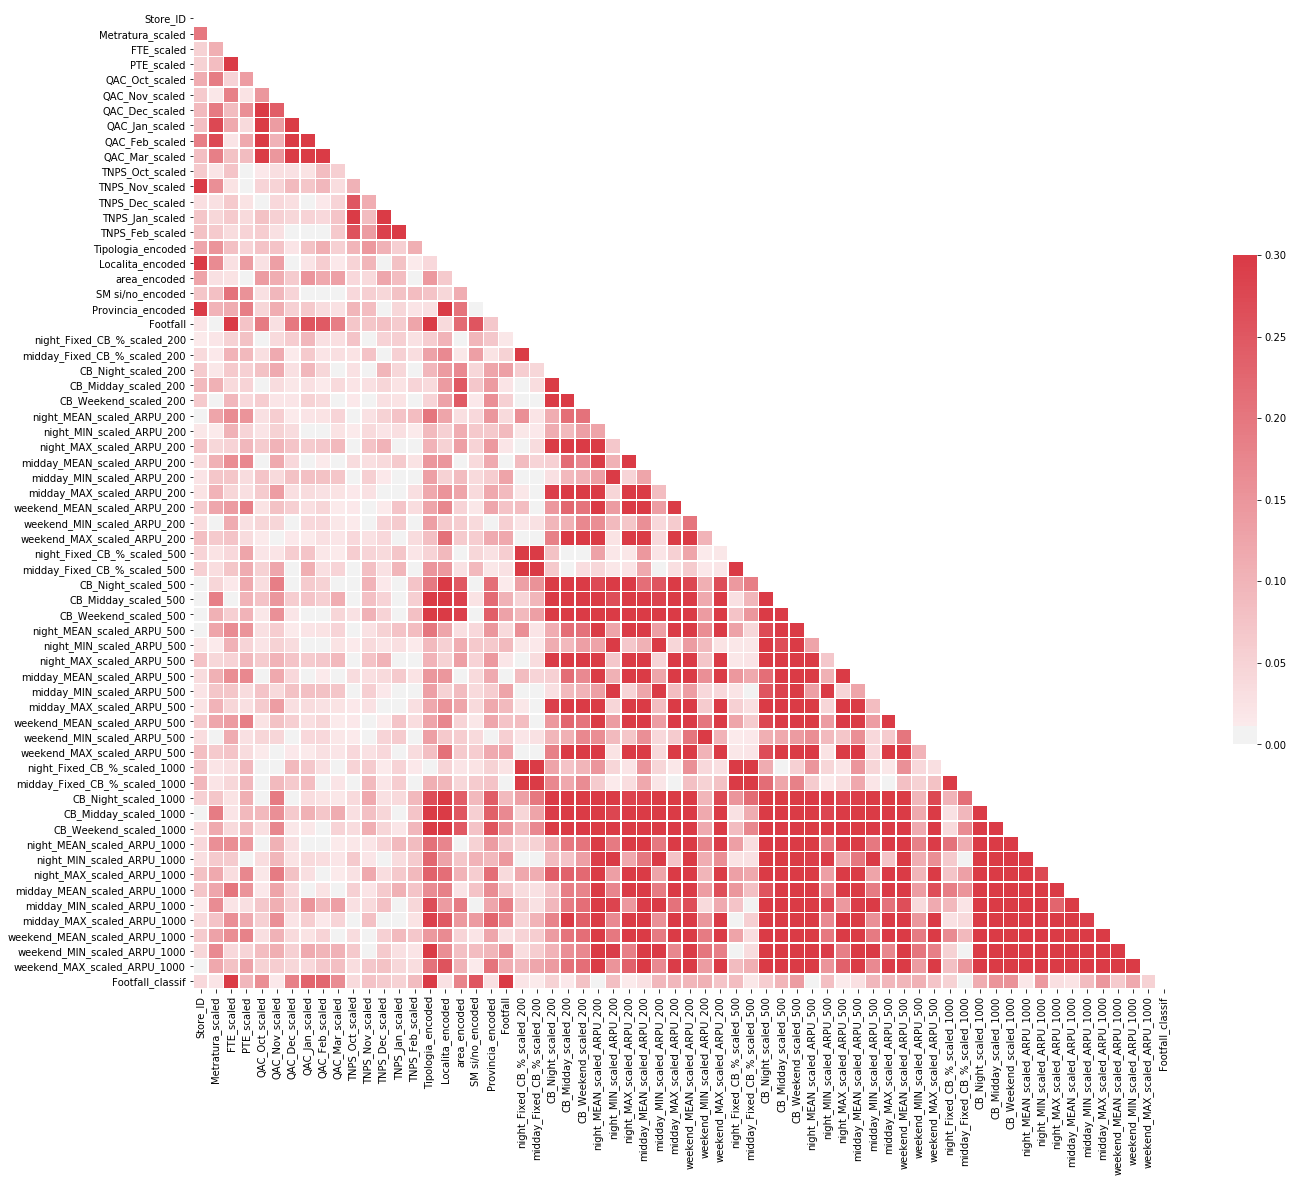

In [373]:
# Compute the correlation matrix
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Dimensionality Reduction
Because of the large amount of features(62), we need to reduce the number of the dimensions in the dataset. In the process of reducing dimensions, the assumptions are as following.
- Features with unbalanced distribution should be reduced: variance lower than 0.01.

/Users/apple/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


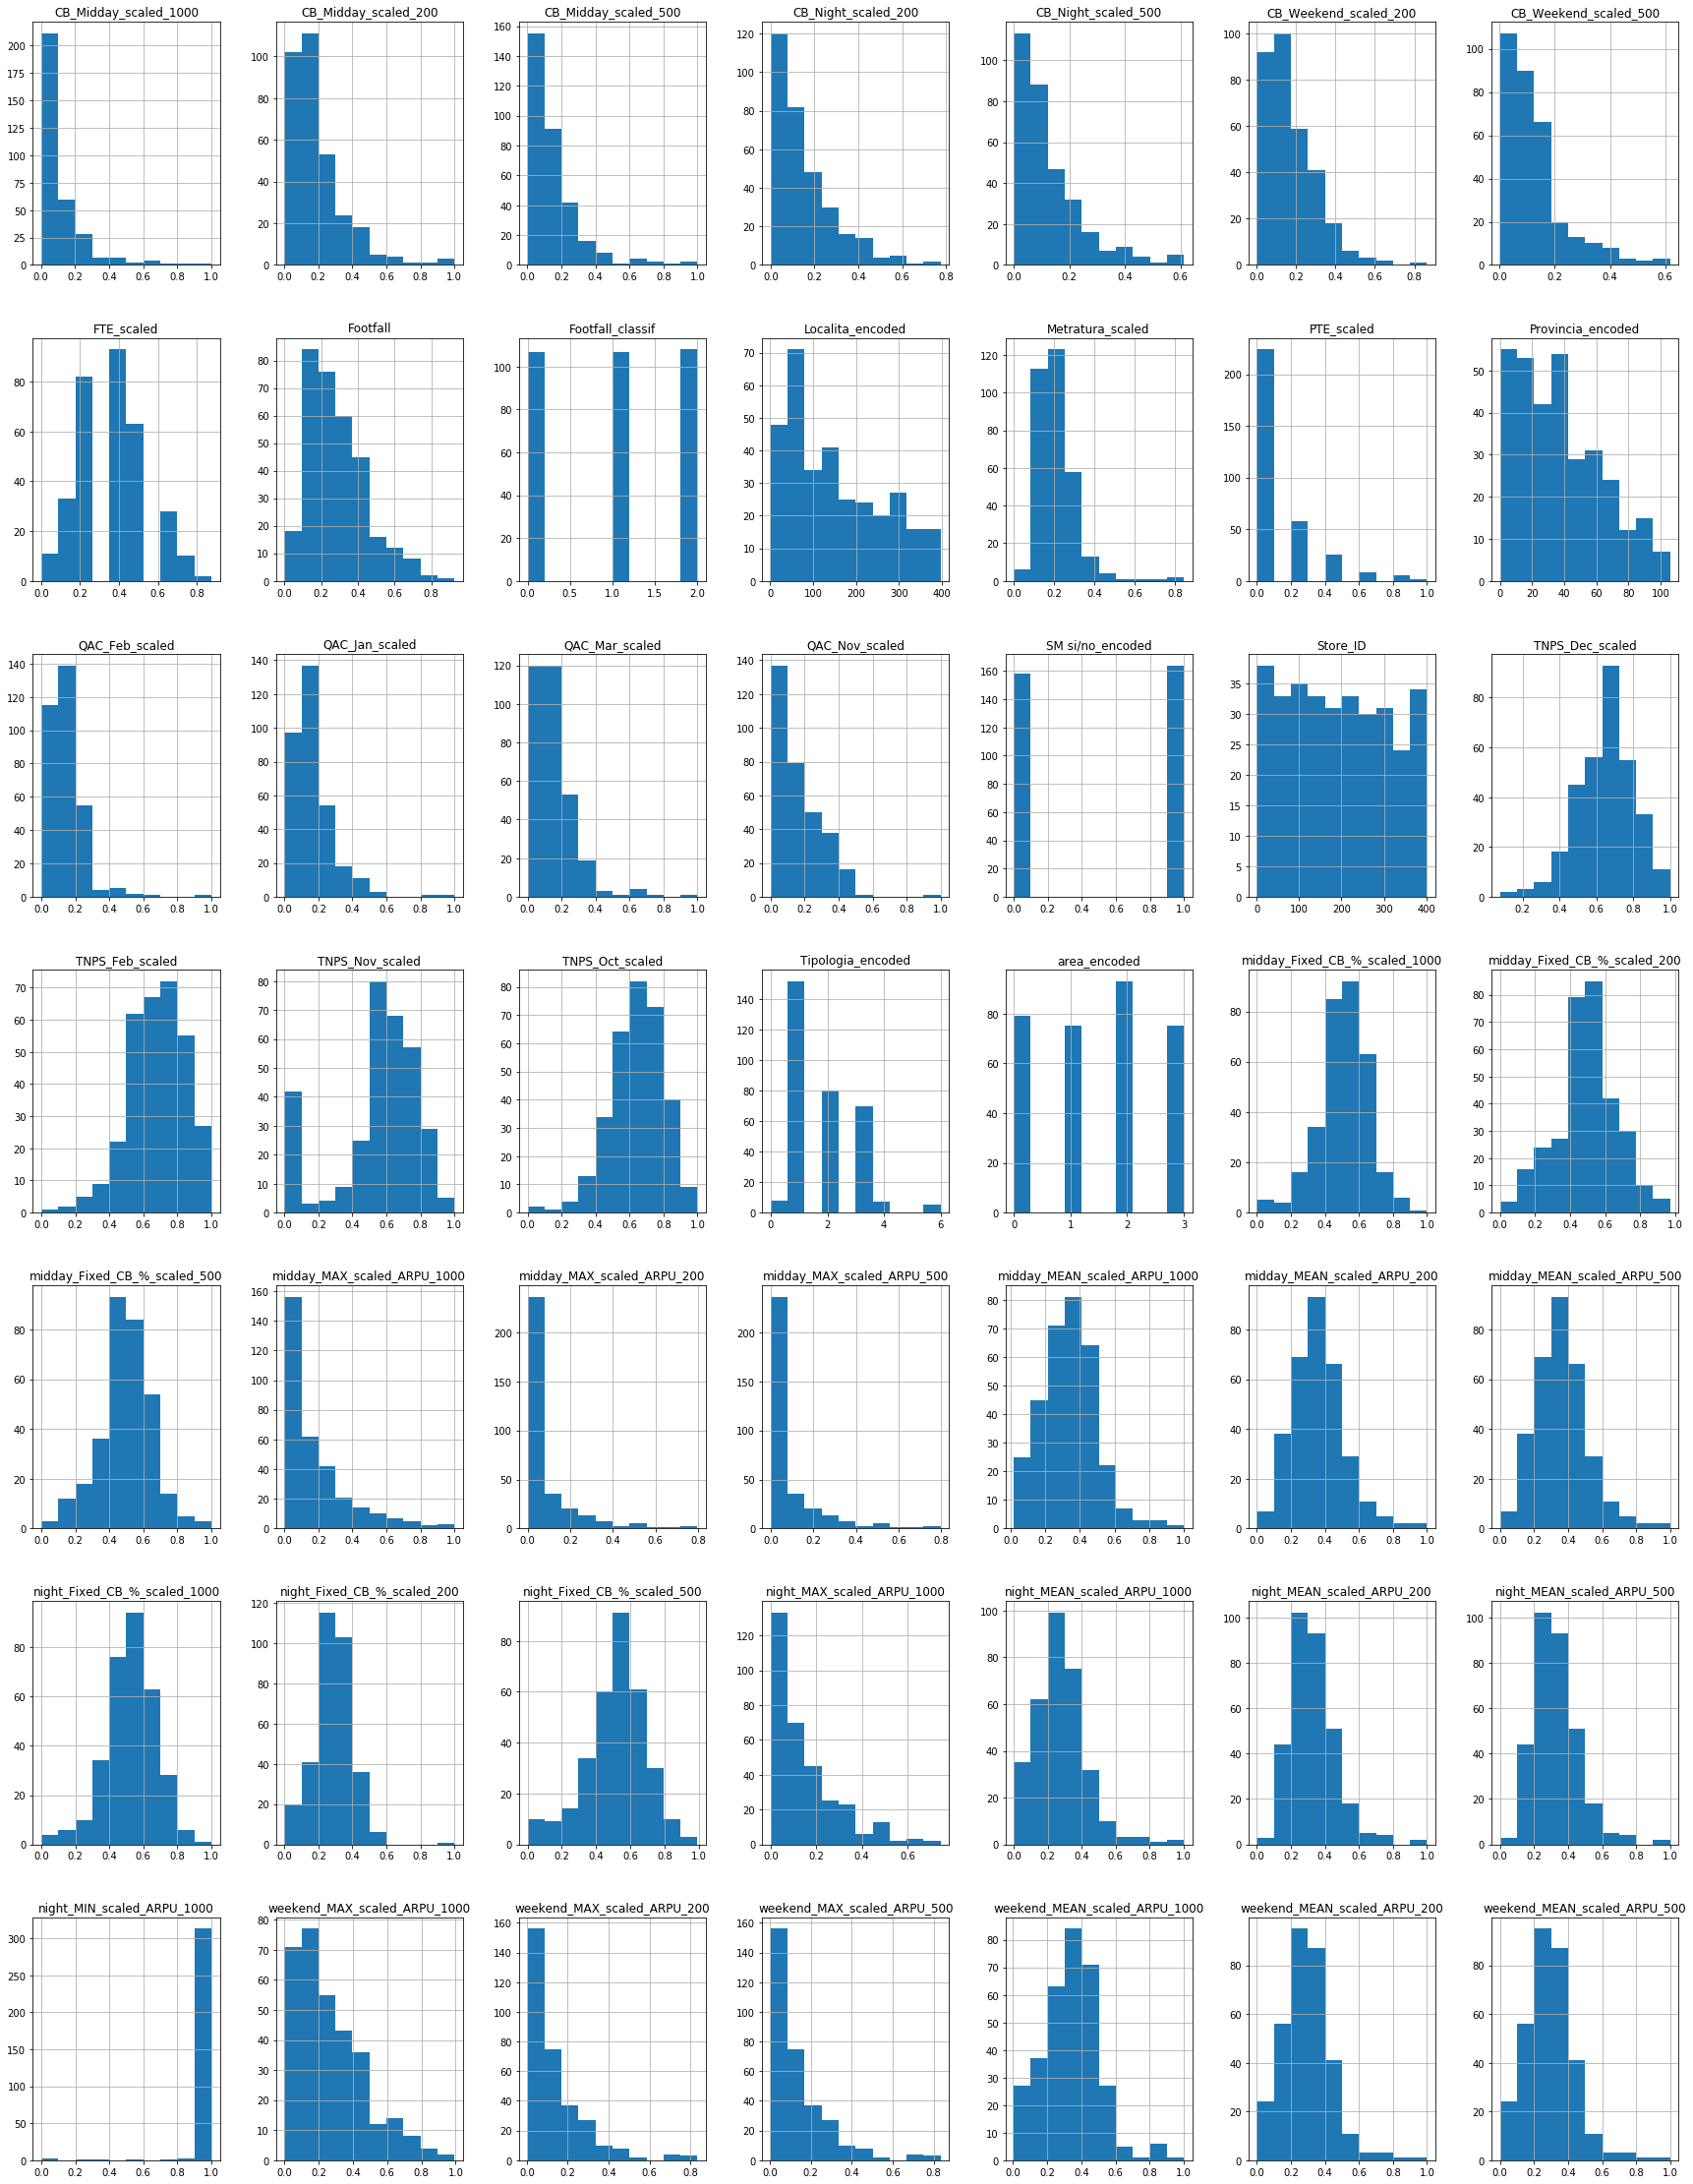

In [374]:
for i in list(df.head(0)):
    if (np.var(df[[i]])[i] < 0.01):
        df = df.drop([i], axis = 1)
fig = plt.figure(figsize = (30,40))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

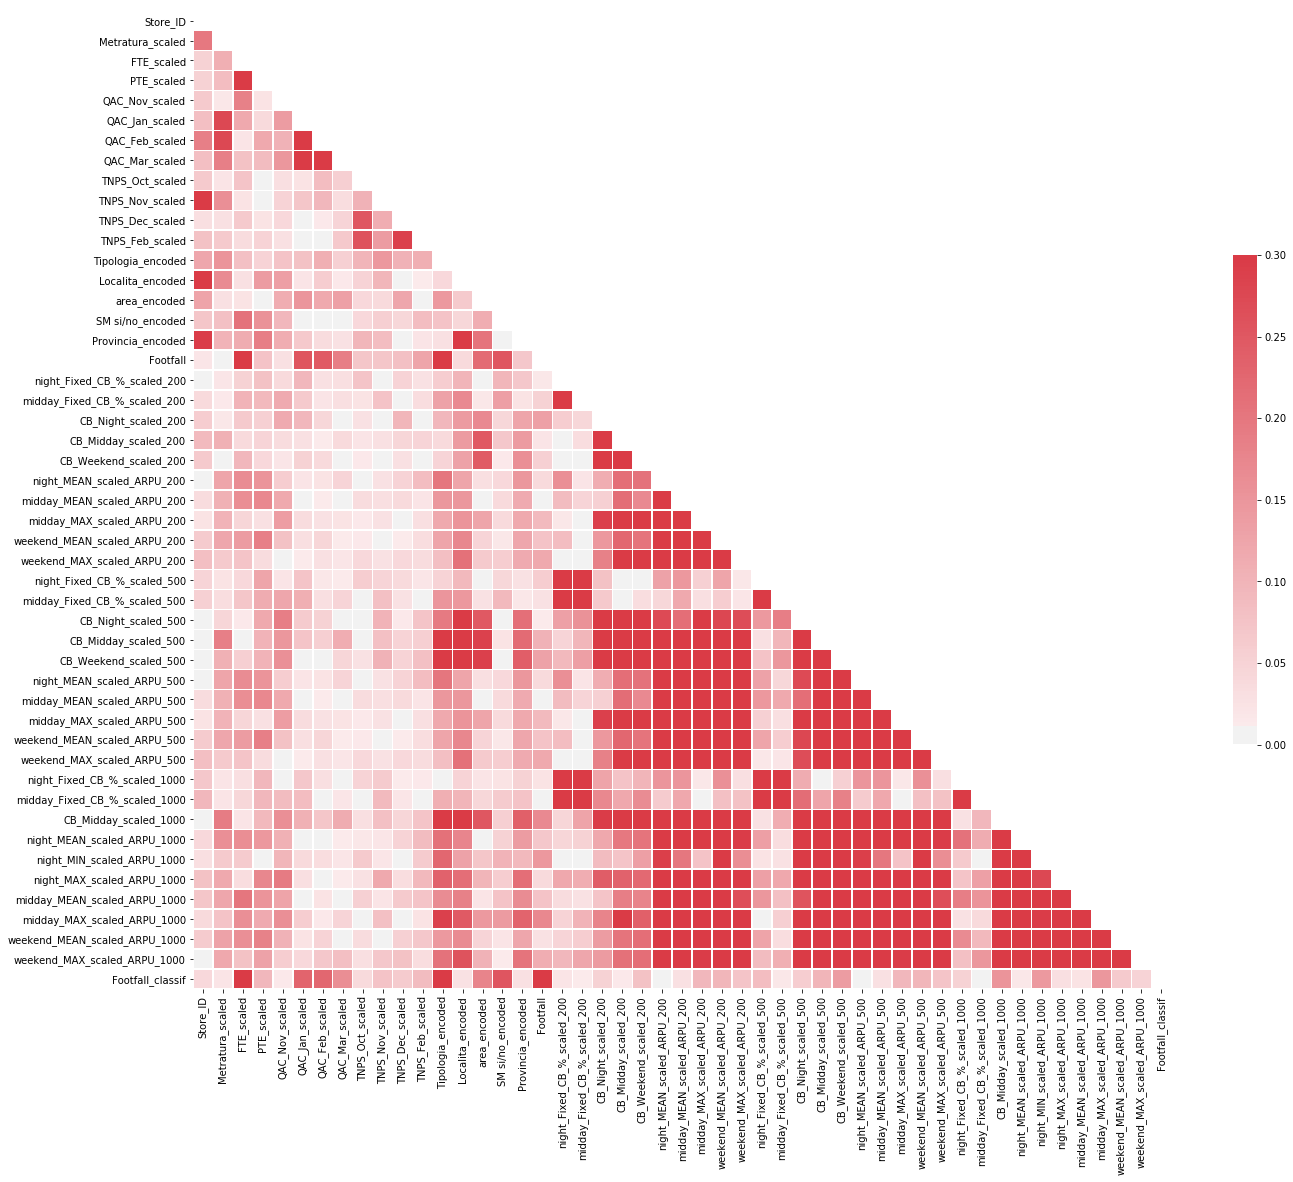

In [375]:
# Compute the correlation matrix
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 49 columns):
Store_ID                         322 non-null int64
Metratura_scaled                 322 non-null float64
FTE_scaled                       322 non-null float64
PTE_scaled                       322 non-null float64
QAC_Nov_scaled                   322 non-null float64
QAC_Jan_scaled                   322 non-null float64
QAC_Feb_scaled                   322 non-null float64
QAC_Mar_scaled                   322 non-null float64
TNPS_Oct_scaled                  322 non-null float64
TNPS_Nov_scaled                  322 non-null float64
TNPS_Dec_scaled                  322 non-null float64
TNPS_Feb_scaled                  322 non-null float64
Tipologia_encoded                322 non-null int64
Localita_encoded                 322 non-null int64
area_encoded                     322 non-null int64
SM si/no_encoded                 322 non-null int64
Provincia_encoded                322 non-

### One Hot Encoding

Before we do the PCA, we need to turn catalogue variables with the distance between each 2 values are the same. First, we need to change the types of catalogue variables within the datafile to **boject**.

In [377]:
df['Store_ID'] = df['Store_ID'].astype('object')
df['Tipologia_encoded'] = df['Tipologia_encoded'].astype('object')
df['Localita_encoded'] = df['Localita_encoded'].astype('object')
df['area_encoded'] = df['area_encoded'].astype('object')
df['Provincia_encoded'] = df['Provincia_encoded'].astype('object')
df['SM si/no_encoded'] = df['SM si/no_encoded'].astype('object')

In [378]:
df = pd.get_dummies(df, prefix=['Store_ID', 'Tipologia_encoded','Localita_encoded','area_encoded','Provincia_encoded','SM si/no_encoded'])

### PCA Reduction:
In the previous approach, we reduced the features from 62 to 47, but we have seen the correlated problem from the heatmap. So that we need to reduce more dimensations.

# 1. Predict the value

*This branch is used for predicting the  footprint so we will drop labels from the dataset.*

In [379]:
predata = df.drop(['Footfall_classif'], axis = 1)

Split the features and the value.

In [380]:
X = predata.drop(['Footfall'], axis = 1)
y = predata[['Footfall']]

In [381]:
rcParams['figure.figsize'] = 5,4

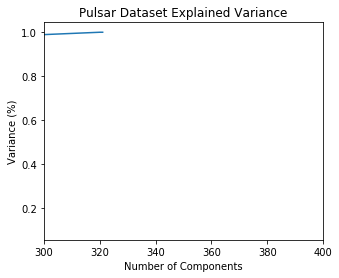

In [388]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(left = 300, right = 400)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [389]:
pca = PCA(n_components = 320)
X = pca.fit_transform(X)

### Split training and testing set
We use 80% of as training data and 20% as testing data.

In [390]:
msk = np.random.rand(len(df)) < 0.8
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

### Use xgboost to train the model

In [391]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42,shuffle=True)

xgb1=xgb.XGBRegressor(learning_rate=0.1, n_estimators=500,
                  silent=1, objective='reg:linear',
                  gamma=0,subsample=0.8,colsample_bytree=0.8,
                  nthread=4,scale_pos_weight=1,seed=27)

parameters ={'max_depth':[4,5,6],'min_child_weight':list(range(1,6,2))}
grid_xgb=GridSearchCV(estimator=xgb1,param_grid=parameters,cv=kf,scoring='neg_mean_squared_error')

grid_xgb.fit(X_train,y_train)
grid_xgb.best_params_

#{'max_depth': 4, 'min_child_weight': 1}

RMSE = np.sqrt(-grid_xgb.best_score_)
print(RMSE)

0.12140033860592345


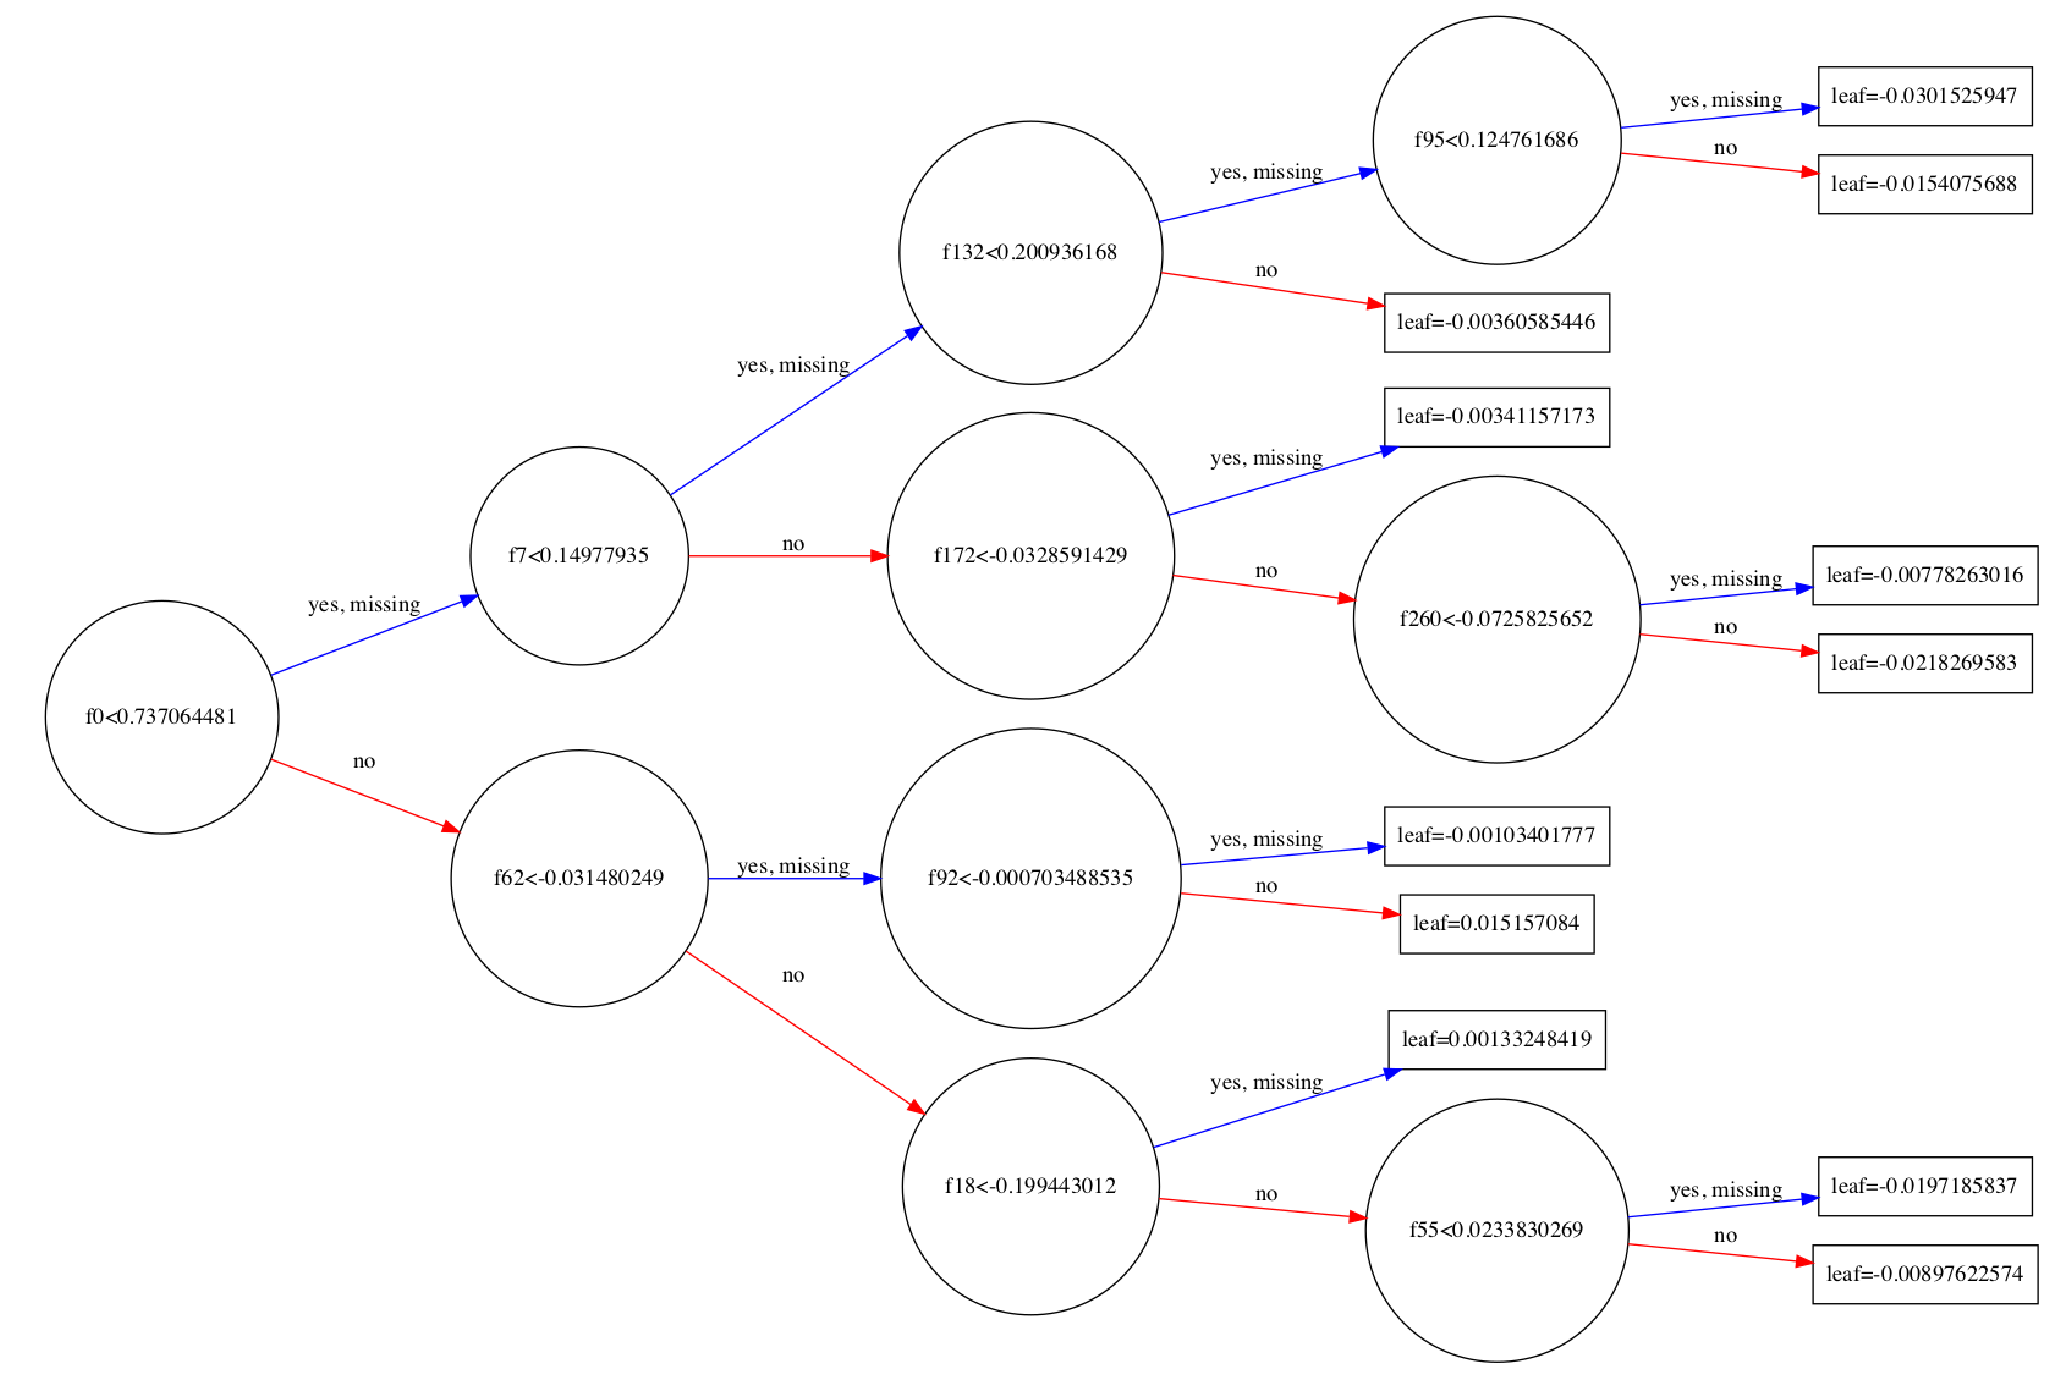

In [392]:
bst=grid_xgb.best_estimator_

import graphviz
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40,25
xgb.plot_tree(bst, num_trees=0, rankdir= 'LR' )
plt.show()

pred_y=bst.predict(X_test)

The mean square error (given in the case as RSS):

In [393]:
print("Residual sum of squares: %.2f"
  % np.mean((pred_y - y_test.values) ** 2))

Residual sum of squares: 0.03


# 2. Classify the label

*This branch is used for classifying the labels of the footprint so we will drop values from the dataset.*

In [428]:
clfdata = df.drop(['Footfall'], axis = 1)

Split the features and the value.

In [429]:
X = clfdata.drop(['Footfall_classif'], axis = 1)
y = clfdata[['Footfall_classif']]

In [430]:
rcParams['figure.figsize'] = 5,4

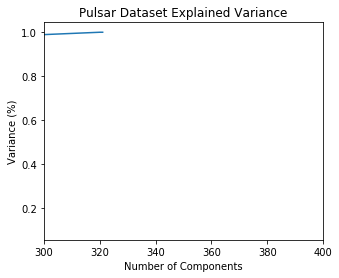

In [431]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(left = 300, right = 400)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [432]:
pca = PCA(n_components = 320)
X = pca.fit_transform(X)

### Split training and testing set
We use 80% of as training data and 20% as testing data.

In [433]:
msk = np.random.rand(len(df)) < 0.8
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

### Use xgboost to train the model

[0]	train-merror:0.227799	test-merror:0.507937
[1]	train-merror:0.142857	test-merror:0.507937
[2]	train-merror:0.108108	test-merror:0.47619
[3]	train-merror:0.07722	test-merror:0.428571
[4]	train-merror:0.061776	test-merror:0.460317
[5]	train-merror:0.046332	test-merror:0.460317
[6]	train-merror:0.034749	test-merror:0.460317
[7]	train-merror:0.023166	test-merror:0.412698
[8]	train-merror:0.019305	test-merror:0.444444
[9]	train-merror:0.015444	test-merror:0.460317
[10]	train-merror:0.015444	test-merror:0.492063
[11]	train-merror:0.003861	test-merror:0.47619
[12]	train-merror:0.007722	test-merror:0.428571
[13]	train-merror:0.003861	test-merror:0.412698
[14]	train-merror:0.003861	test-merror:0.444444
[15]	train-merror:0.003861	test-merror:0.412698
[16]	train-merror:0.003861	test-merror:0.428571
[17]	train-merror:0.003861	test-merror:0.444444
[18]	train-merror:0.003861	test-merror:0.444444
[19]	train-merror:0.003861	test-merror:0.428571
[20]	train-merror:0.003861	test-merror:0.47619
[21]	t

[193]	train-merror:0	test-merror:0.444444
[194]	train-merror:0	test-merror:0.444444
[195]	train-merror:0	test-merror:0.444444
[196]	train-merror:0	test-merror:0.460317
[197]	train-merror:0	test-merror:0.444444
[198]	train-merror:0	test-merror:0.444444
[199]	train-merror:0	test-merror:0.444444
[200]	train-merror:0	test-merror:0.444444
[201]	train-merror:0	test-merror:0.444444
[202]	train-merror:0	test-merror:0.444444
[203]	train-merror:0	test-merror:0.444444
[204]	train-merror:0	test-merror:0.444444
[205]	train-merror:0	test-merror:0.444444
[206]	train-merror:0	test-merror:0.444444
[207]	train-merror:0	test-merror:0.444444
[208]	train-merror:0	test-merror:0.444444
[209]	train-merror:0	test-merror:0.444444
[210]	train-merror:0	test-merror:0.444444
[211]	train-merror:0	test-merror:0.444444
[212]	train-merror:0	test-merror:0.444444
[213]	train-merror:0	test-merror:0.444444
[214]	train-merror:0	test-merror:0.444444
[215]	train-merror:0	test-merror:0.444444
[216]	train-merror:0	test-merror:0

[389]	train-merror:0	test-merror:0.460317
[390]	train-merror:0	test-merror:0.460317
[391]	train-merror:0	test-merror:0.460317
[392]	train-merror:0	test-merror:0.460317
[393]	train-merror:0	test-merror:0.460317
[394]	train-merror:0	test-merror:0.460317
[395]	train-merror:0	test-merror:0.460317
[396]	train-merror:0	test-merror:0.460317
[397]	train-merror:0	test-merror:0.460317
[398]	train-merror:0	test-merror:0.460317
[399]	train-merror:0	test-merror:0.460317
[400]	train-merror:0	test-merror:0.460317
[401]	train-merror:0	test-merror:0.460317
[402]	train-merror:0	test-merror:0.460317
[403]	train-merror:0	test-merror:0.460317
[404]	train-merror:0	test-merror:0.460317
[405]	train-merror:0	test-merror:0.460317
[406]	train-merror:0	test-merror:0.460317
[407]	train-merror:0	test-merror:0.460317
[408]	train-merror:0	test-merror:0.460317
[409]	train-merror:0	test-merror:0.460317
[410]	train-merror:0	test-merror:0.460317
[411]	train-merror:0	test-merror:0.460317
[412]	train-merror:0	test-merror:0

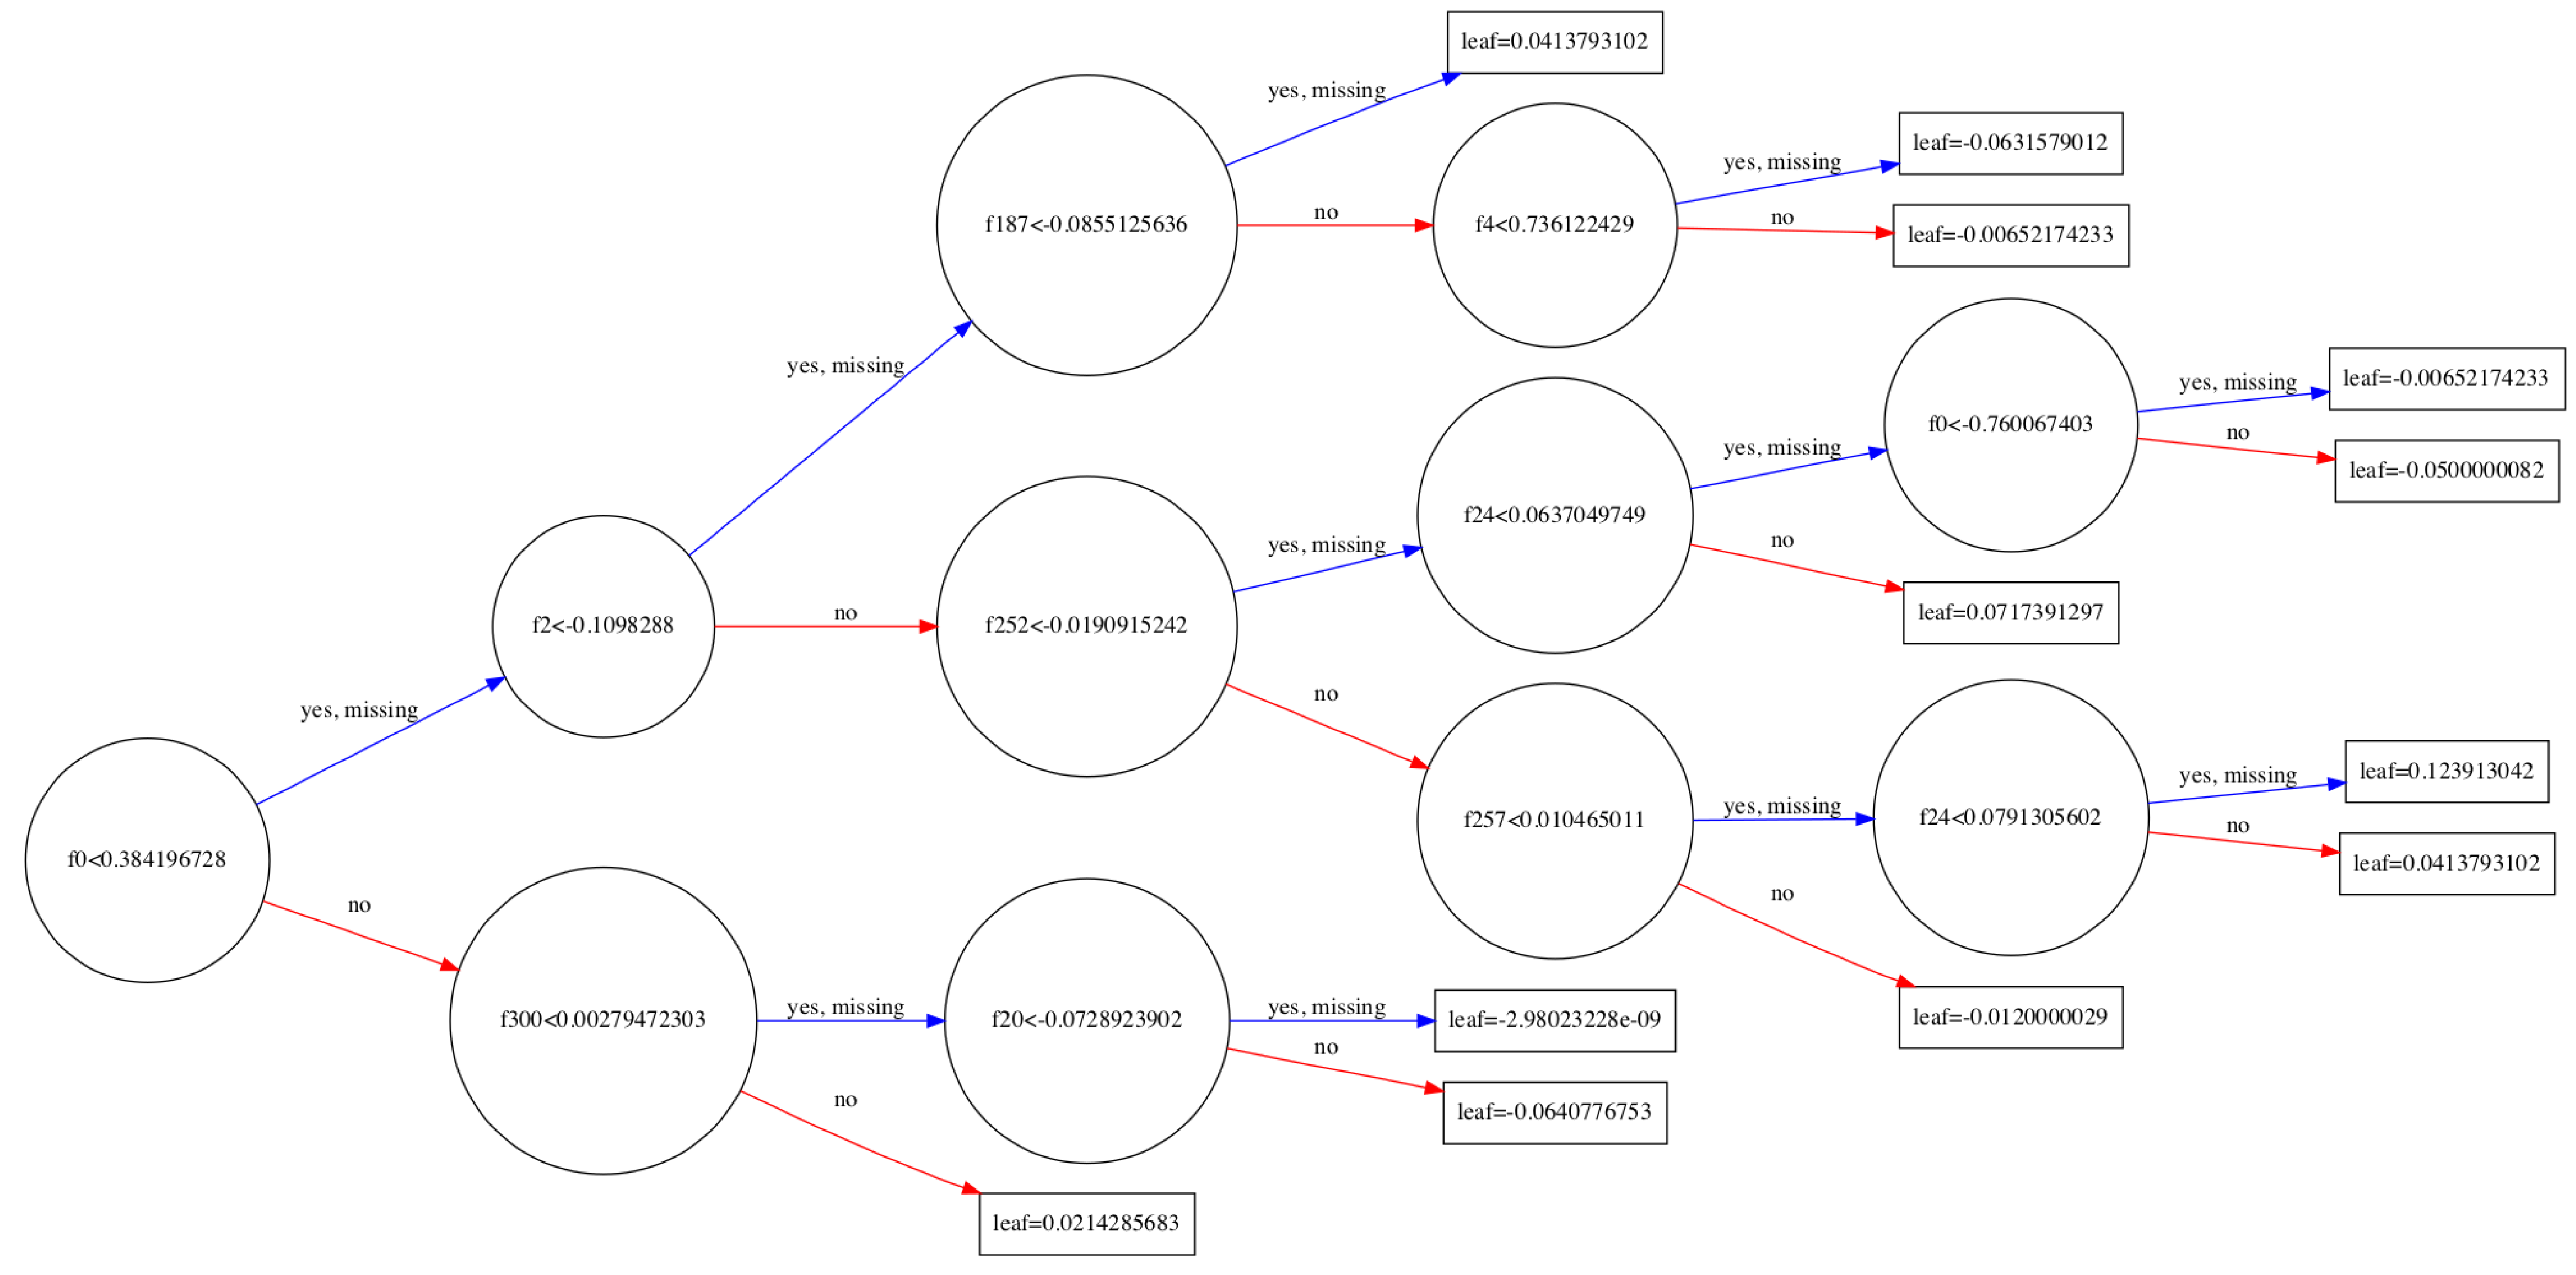

In [434]:
import xgboost as xgb

xg_train = xgb.DMatrix(X_train, label = y_train)
xg_test = xgb.DMatrix(X_test, label = y_test)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()

watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 500
bst = xgb.train(plst, xg_train, num_round, watchlist );

import graphviz
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(bst, num_trees=0, rankdir= 'LR' )
plt.show()

In [435]:
# get prediction
pred_y = bst.predict(xg_test)

In [450]:
acc_matrix = (pred_y == y_test.values.reshape(-1))

In [451]:
acc_matrix

array([ True, False, False,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True])

The accuracy of classify (given in the case as Acc):

In [449]:
accuracy = np.sum(acc_matrix)/len(acc_matrix)
print('The accuracy is: %.2f%%' % (accuracy * 100))

The accuracy is: 53.97%


# 3. Feature engineering of test data

In [458]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline